
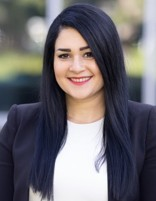
---
---
---


### Project Title: ExtraaLern Project
### Prepared by: Sona Shakoory
### Program: MIT Professional Education – Applied Data Science
### Practical Data Science: Potential Customer Prediction Classification
---
---

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

---


Lets start by importing the required libraries

---

In [ ]:
# # Importing essential libraries for data analysis and modeling

# Libraries to help with reading and data cleaning
import pandas as pd
import numpy as np
import math

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Z-score standardization to normalize the feature distribution
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Also importing tree module for model visualization and analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, make_scorer, accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
data=pd.read_excel("/content/drive/MyDrive/Elective_PDS/ExtraaLearn.xlsx")

---


The next step is to examine the data structure. The Excel file has been saved in my Google Drive under the "Elective_PDS" folder.


---

In [ ]:
# returns the first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# returns the last 5 rows
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# Return the total number of rows and columns in the dataset
data.shape

(4612, 15)

In [ ]:
# Print a summary of the DataFrame's structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
# find number of unique IDs
data.ID.nunique()

4612

---


Since each row represents a unique lead, the ID column does not contribute to predictive modeling and can be dropped from the dataset.

---


In [ ]:
# drop the ID column
data = data.drop(['ID'], axis = 1)

In [ ]:
# Print a summary of the DataFrame's updated structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

---
**Data Summary & Observations**

* The dataset comprises **4,612** records across **14** features (after excluding the ID column).

* Data Types: 1 float (page_views_per_visit), 4 integers (age, website_visits, time_spent_on_website, status [0 = not converted, 1 = converted]), and 9 categorical (object) features capturing lead attributes and interactions.

* Data completeness: No missing values detected across any feature.
---


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Data Preprocessing and Exploratory Data Analysis**


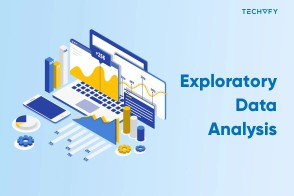


In [ ]:
# summary of the data
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,4612,2,No,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Summary of Numerical Features

---

We will now explore the distribution of continuous variables to gain deeper insights into their behavior and potential impact.

---


In [ ]:
# summary statistics for numeric features

numerical_col = data.select_dtypes('number').columns

data[numerical_col] .describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


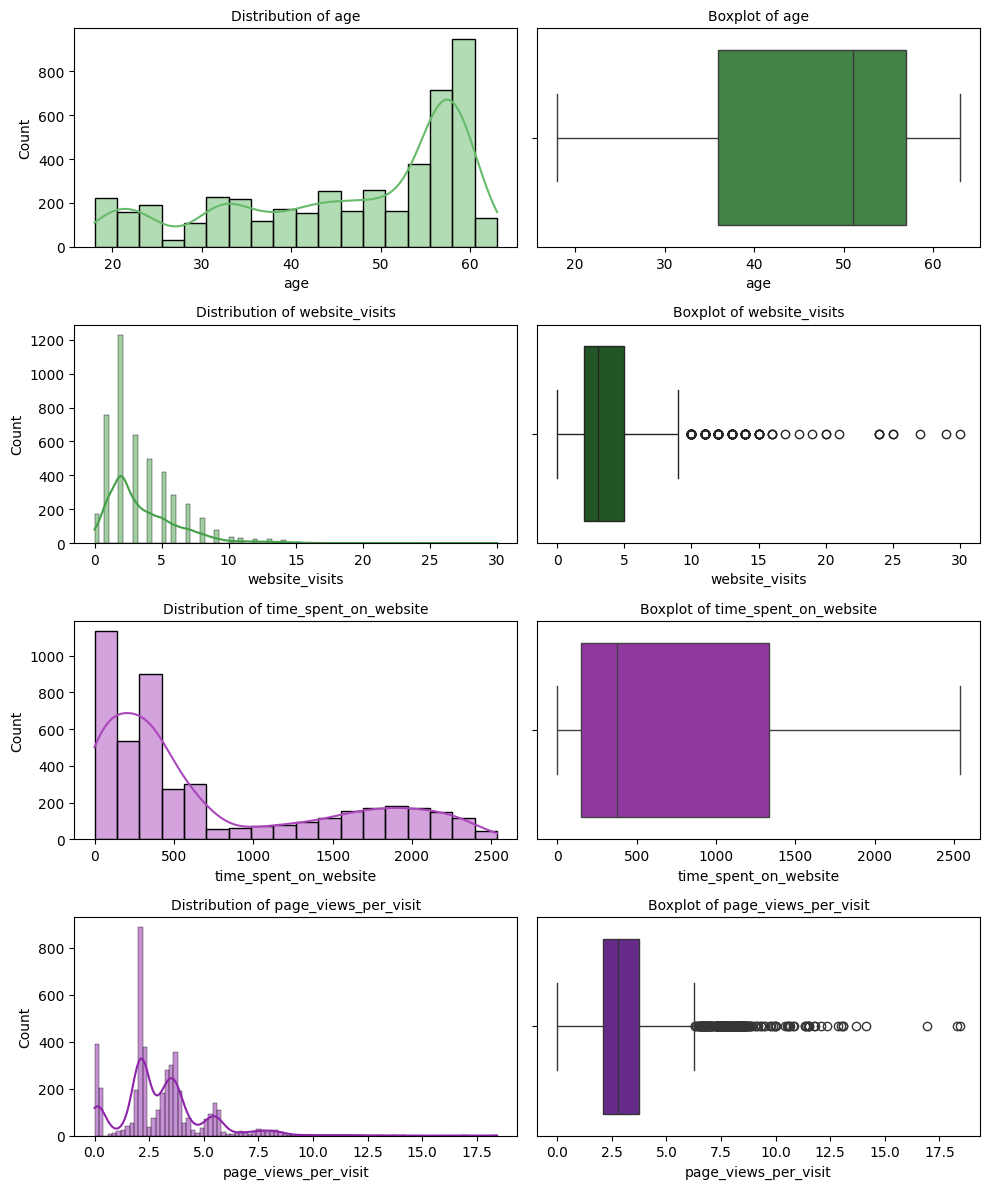

In [ ]:
# Continuous variables
continuous_vars = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Custom green and purple shades
hist_colors = ['#66bb6a', '#43a047', '#ab47bc', '#8e24aa']  # lighter to darker green and purple
box_colors = ['#388e3c', '#1b5e20', '#9c27b0', '#6a1b9a']   # deep green and violet tones

# Create histograms and boxplots for each variable
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(10, 12))

for i, col in enumerate(continuous_vars):
    # Histogram (green or purple based on index)
    sns.histplot(data[col], kde=True, ax=axes[i, 0], color=hist_colors[i])
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=10)
    axes[i, 0].set_xlabel(col)

    # Boxplot (matching tone)
    sns.boxplot(x=data[col], ax=axes[i, 1], color=box_colors[i])
    axes[i, 1].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

---
**Key Observations**

* **Age**
 * Average age of leads is 46 years, ranging from 18 to 63.
 * Over 75% of leads are older than 36, indicating a mature audience segment
 * Age distribution is moderately spread with no significant outliers.

* **Website Visits**
 * Leads visit the website an average of 3.5 times.
 * The range spans from 1 to 30 visits, with a wide gap between the 75th percentile (5 visits) and the max, suggesting a subset of highly engaged outliers.

* **Time Spent on Website**
 * Average time spent is 724 seconds (\~12 minutes), ranging from 0 to 2,537 seconds (\~42 minutes).
 * The top 25% of leads spend over 1,300 seconds (~22 minutes), highlighting deeper engagement among some users.

* **Page Views per Visit**
 * On average, leads view 3 pages per visit.
 * While most leads fall within a reasonable range, a small group exceeds 18 page views, pointing to potential high-intent prospects.

* **Outliers**
 * No outliers detected in age or time_spent_on_website, indicating stable distributions.
 * 154 outliers found in website_visits suggest a subset of leads are revisiting the site frequently — potentially high-interest users.
 * 257 outliers in page_views_per_visit indicate unusually deep engagement during single sessions, which may signal strong intent or anomalous behavior.Outliers:

---



In [ ]:
# Detect and count outliers using IQR method
outlier_summary = {}
for col in continuous_vars:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print("Outlier Summary:\n")
display(outlier_df)

Outlier Summary:



,Outlier Count
age,0
website_visits,154
time_spent_on_website,0
page_views_per_visit,257


In [ ]:
# We want to filter values based on the 90 percentile and exclude the outliers
q1 = data["website_visits"].quantile(0.90)
q2 = data["page_views_per_visit"].quantile(0.90)
print(q1, q2)

7.0 5.5139000000000005


In [ ]:
# Defining the hist_box() function for eah feature
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(10, 4))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

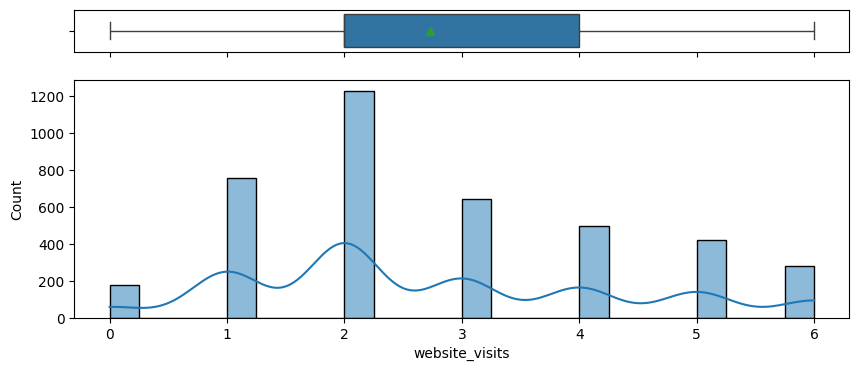

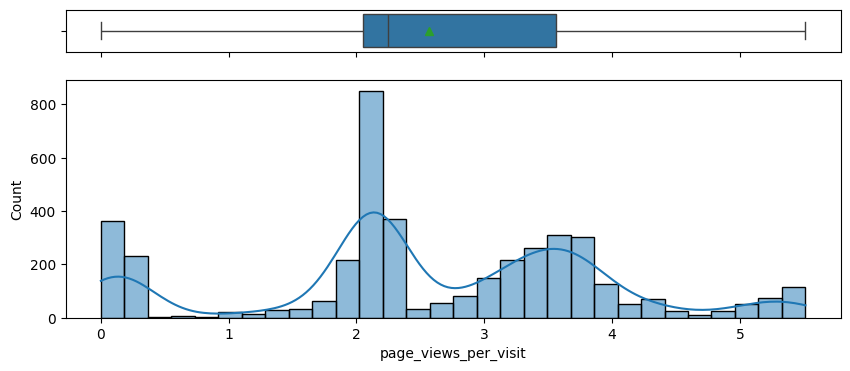

In [ ]:
hist_box(data[data['website_visits'] < q1], 'website_visits')
hist_box(data[data['page_views_per_visit'] < q2], 'page_views_per_visit')

---

Outliers are minimal, affecting only ~3.3% of rows for website_visits and ~5.6% for page_views_per_visit, with no outliers in age or time_spent_on_website. Given the low proportion and presence of conversions among outliers, they appear to be valid high-engagement behaviors rather than anomalies. These data points should be retained to preserve signal strength and improve model accuracy, especially for identifying niche but valuable lead profiles.

---

Correlation Matrix:



,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.00,-0.01,0.02,-0.04,0.12
website_visits,-0.01,1.00,0.06,0.07,-0.01
time_spent_on_website,0.02,0.06,1.00,0.07,0.30
page_views_per_visit,-0.04,0.07,0.07,1.00,0.00
status,0.12,-0.01,0.30,0.00,1.00


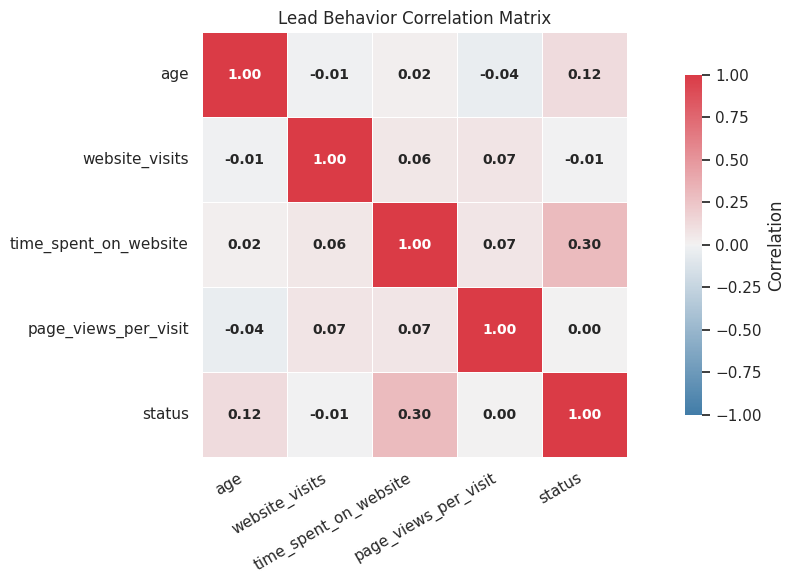

In [ ]:
# Select only numeric columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Compute correlation matrix
corr_matrix = data[cols_list].corr()
# Display tabular summary
print("Correlation Matrix:\n")
display(corr_matrix.round(2))

# Set seaborn style
sns.set(style="white")

# Define an executive-friendly diverging colormap
# You can also try: cmap='coolwarm' or 'vlag' for cleaner contrasts
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 10, "weight": "bold"}
)

# Title and layout for exec clarity
plt.title("Lead Behavior Correlation Matrix", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
**Correlation Insights**

* Time Spent on Website has the strongest positive correlation with conversion status (r = 0.30), indicating higher engagement increases the likelihood of conversion.
* Age shows a weak positive correlation with conversion (r = 0.12), suggesting older leads may convert slightly more.
* Website Visits and Page Views per Visit show negligible correlation with conversion (r ≈ 0.00), indicating that frequency alone does not drive outcomes.
* No strong negative correlations were observed between any variables.
* Engagement depth (time spent) is a more meaningful predictor of conversion than volume of activity.
---



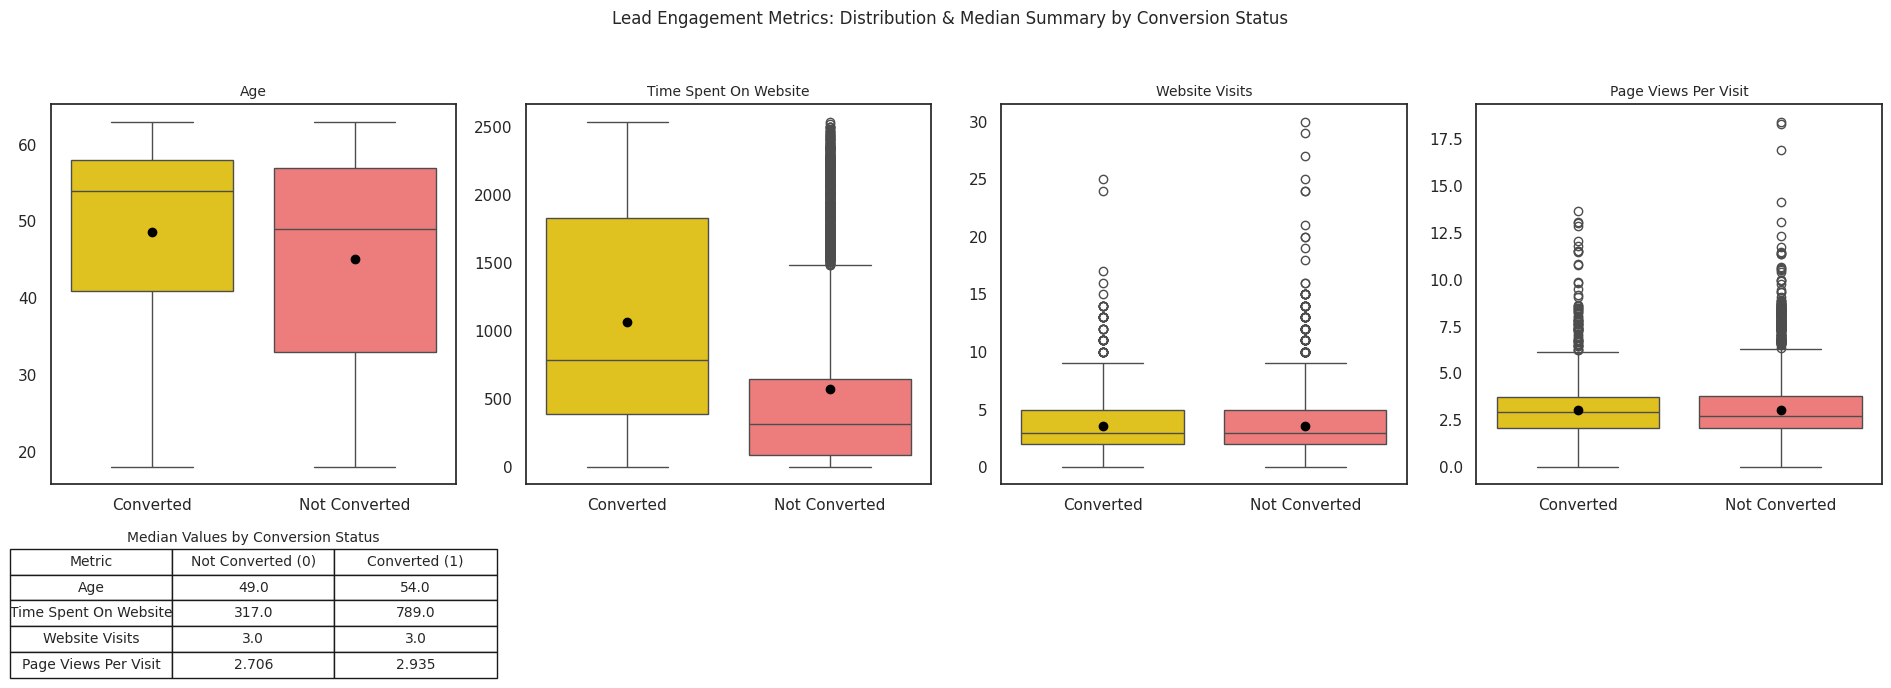

In [ ]:
# Ensure 'status' is integer for calculations
data['status'] = data['status'].astype(int)

# Create labeled version for visualization
data['status_labeled'] = data['status'].map({0: 'Not Converted', 1: 'Converted'})

# Color palette for boxplots
palette = {
    'Not Converted': '#FF6B6B',  # bright red
    'Converted': '#FFD700'       # golden yellow
}

# Numeric features to analyze
num_cols = ['age', 'time_spent_on_website', 'website_visits', 'page_views_per_visit']

# Create median summary DataFrame
summary = pd.DataFrame(columns=['Metric', 'Not Converted (0)', 'Converted (1)'])
for col in num_cols:
    medians = data.groupby('status')[col].median()
    summary = pd.concat([
        summary,
        pd.DataFrame({
            'Metric': [col.replace('_', ' ').title()],
            'Not Converted (0)': [medians.get(0)],
            'Converted (1)': [medians.get(1)]
        })
    ], ignore_index=True)
summary.set_index('Metric', inplace=True)

# Set up 2-row subplot: boxplots (top), median summary table (bottom)
fig, axes = plt.subplots(2, len(num_cols), figsize=(19, 7), gridspec_kw={'height_ratios': [3, 1]})

# Create boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(
        data=data,
        x='status_labeled',
        y=col,
        palette=palette,
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"},
        ax=axes[0, i]
    )
    axes[0, i].set_title(col.replace('_', ' ').title(), fontsize=10)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('')
    axes[0, i].tick_params(axis='x', rotation=0)

# Display summary table below
axes[1, 0].axis('off')
table = axes[1, 0].table(
    cellText=summary.reset_index().values,
    colLabels=summary.reset_index().columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 0].set_title("Median Values by Conversion Status", fontsize=10)

# Turn off extra bottom-row axes
for j in range(1, len(num_cols)):
    axes[1, j].axis('off')

# Layout and title
plt.suptitle('Lead Engagement Metrics: Distribution & Median Summary by Conversion Status', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

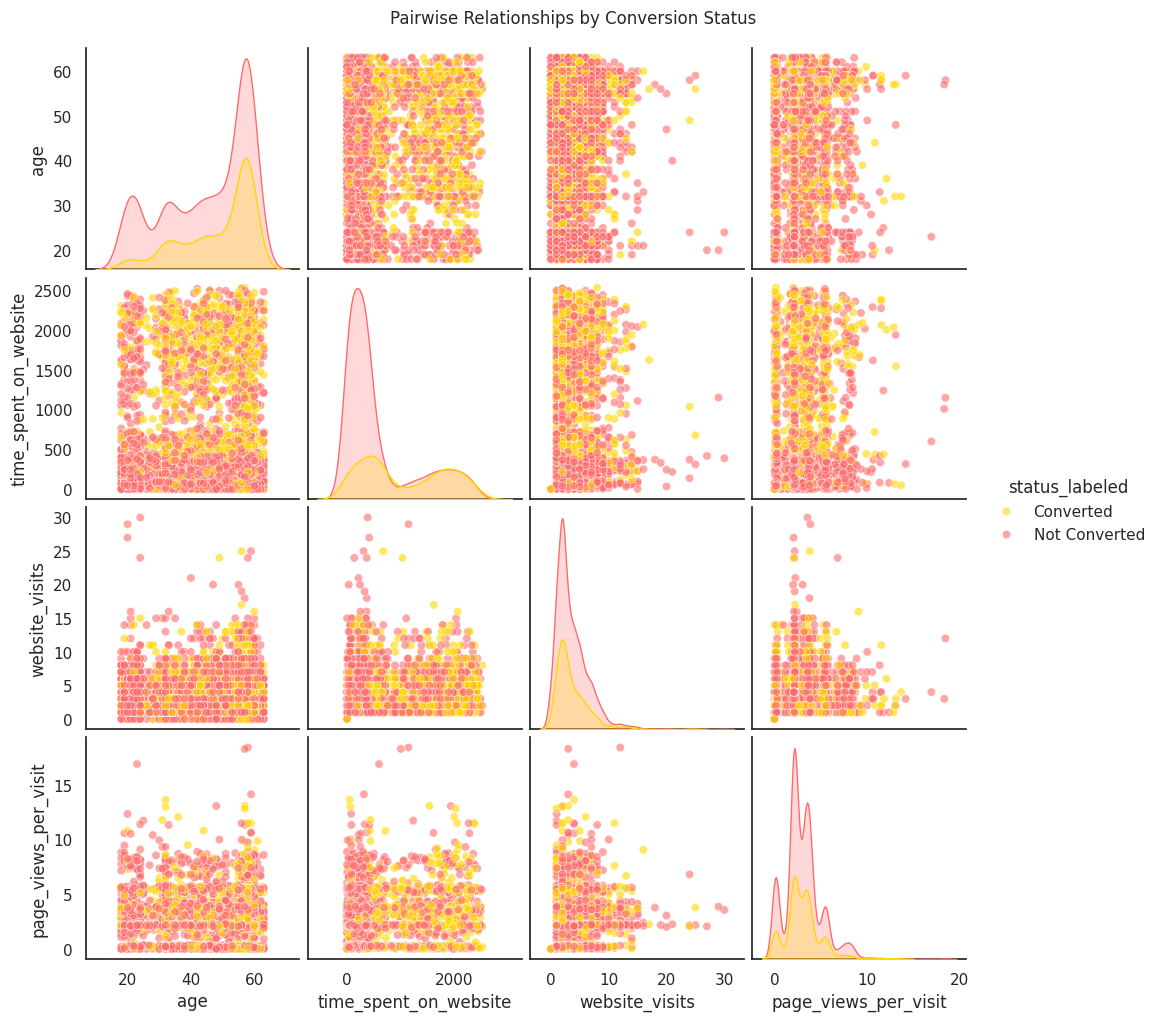

In [ ]:
# Pairplot conditioned on status
sns.pairplot(data, vars=num_cols, hue='status_labeled', palette=palette, plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships by Conversion Status', fontsize=12, y=1.02)
plt.show()

---
Converted leads tend to spend significantly more time on the website and view more pages per visit, indicating that deeper, high-quality engagement is a strong predictor of conversion. In contrast, the total number of website visits shows minimal difference, suggesting that frequency alone does not drive outcomes. Age shows a slight upward trend among converters but is not a strong differentiator. Therefore, driving meaningful engagement during visits—not just traffic volume—is critical to improving conversion.

---




# Summary of Categorical Features

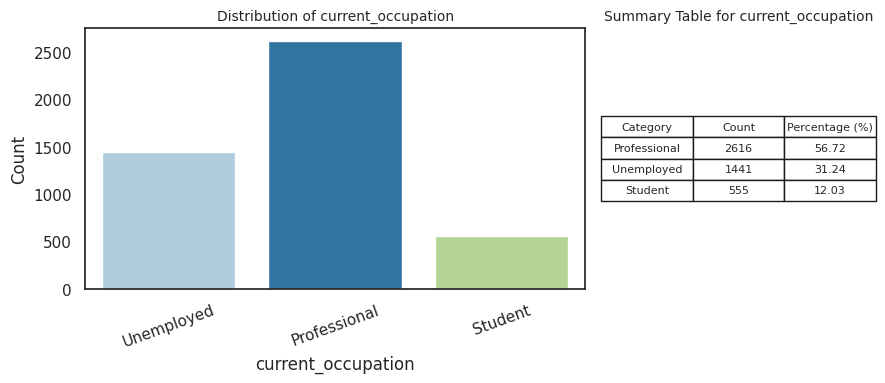

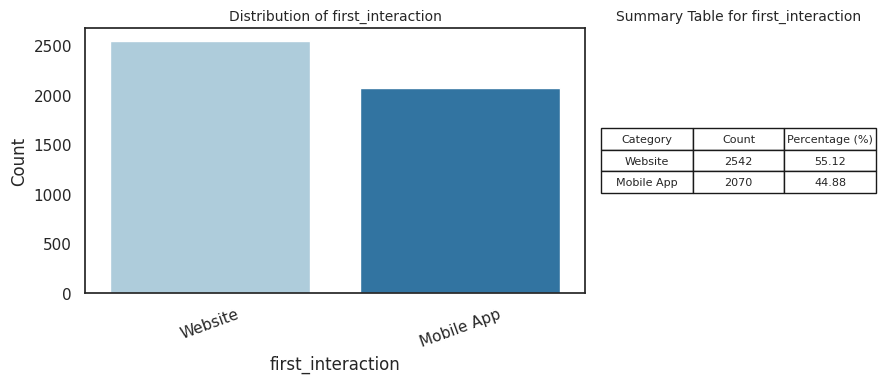

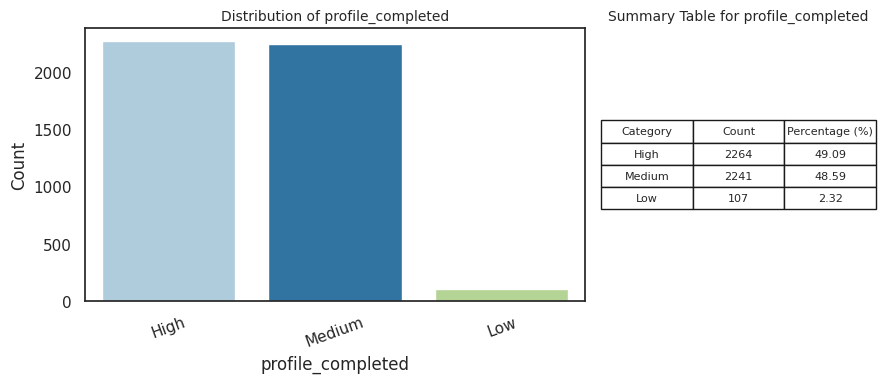

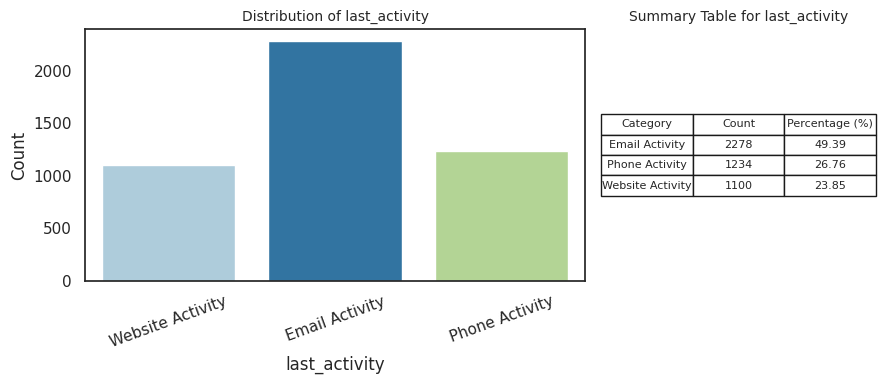

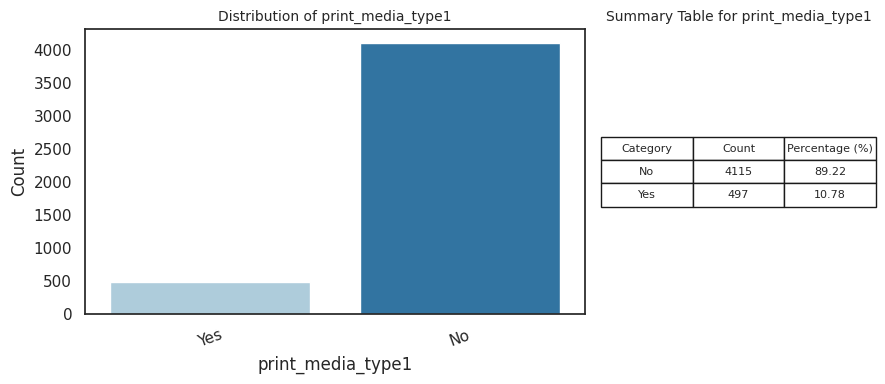

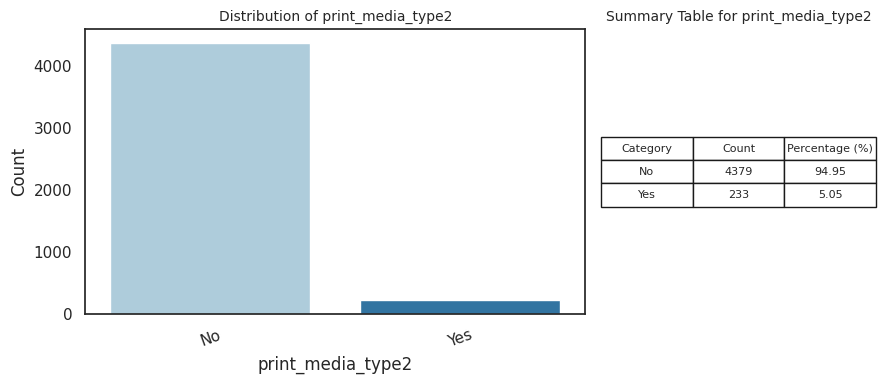

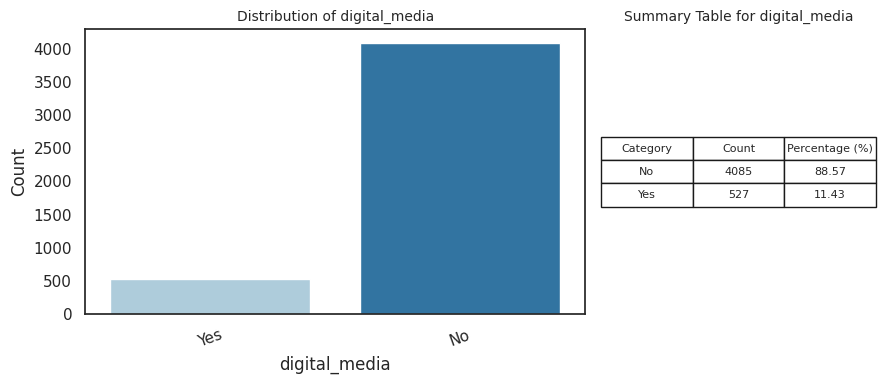

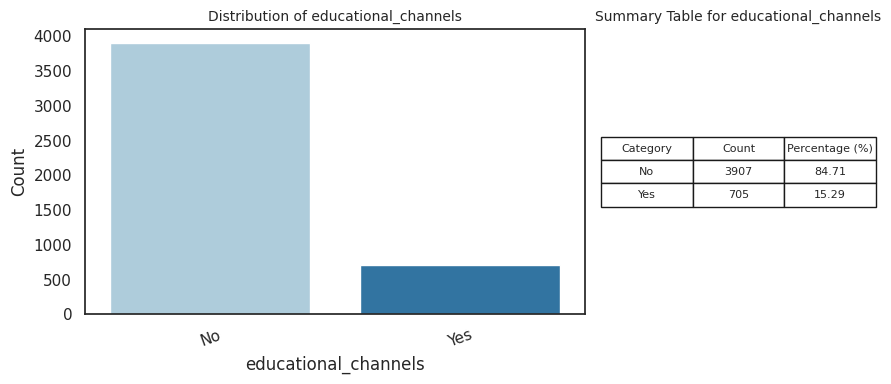

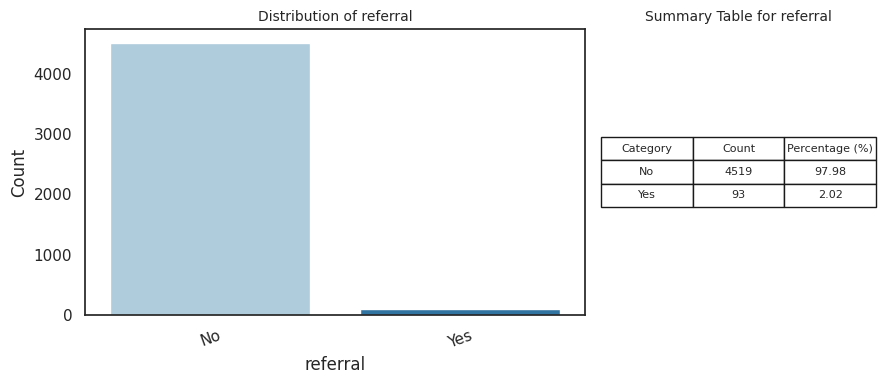

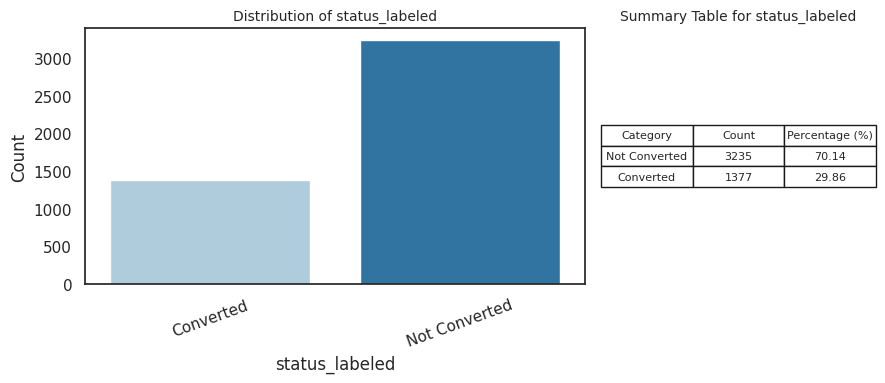

In [ ]:

# Set visual style and brighter palette
sns.set(style="white")
bright_palette = sns.color_palette("Paired") + sns.color_palette("Set3")

# Identify categorical columns
cat_col = list(data.select_dtypes(include='object').columns)

for column in cat_col:


    # Tabular Summary
    counts = data[column].value_counts(dropna=False)
    percentages = data[column].value_counts(normalize=True, dropna=False) * 100
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.round(2)
    })

    # Set up side-by-side plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [2, 1]})

    # Count plot
    sns.countplot(data=data, x=column, palette=bright_palette, ax=ax1)
    ax1.set_title(f'Distribution of {column}', fontsize=10)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=20)

    # Table
    ax2.axis('off')  # Hide axes for table
    table = ax2.table(
        cellText=summary_df.reset_index().values,
        colLabels=['Category', 'Count', 'Percentage (%)'],
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.1, 1.5)
    ax2.set_title(f'Summary Table for {column}', fontsize=10)

    plt.tight_layout()
    plt.show()
    # Add spacing between figures (vertical space)
    print("\n" + "="*100 + "\n")

---
**Categorical Insights Summary**

* **Current Occupation**
 * Professionals make up the majority of leads and also show the highest conversion rate (~36%).
 * Students have the lowest conversion rate (~12%), indicating possible misalignment with program goals or readiness.

* **First Interaction Channel**
 * Leads whose first touchpoint was the website convert at a much higher rate (~45%) than those from mobile apps or other channels.
 * This highlights the importance of the website experience in influencing early lead decisions.

* **Profile Completion**
 * Leads with a highly completed profile convert at significantly higher rates.
 * This suggests that profile completion is a strong indicator of intent, and nudging leads to complete profiles could improve overall conversion.

* **Last Activity**
 * Email-related last activities correlate strongly with conversions.
 * This confirms that email engagement remains an effective follow-up mechanism.

* **Marketing Channels**
 * The majority of leads have not been exposed to ads in print, digital, or educational forums.
 * Conversion rates among those exposed are only marginally better, suggesting current marketing campaigns may need refinement or targeting adjustments.

* **Referrals**
 * Although only a small number of leads are referred, their conversion rate is the highest (~98%).
 * This channel is underutilized and represents a major opportunity for growth through referral incentives or ambassador programs.
---


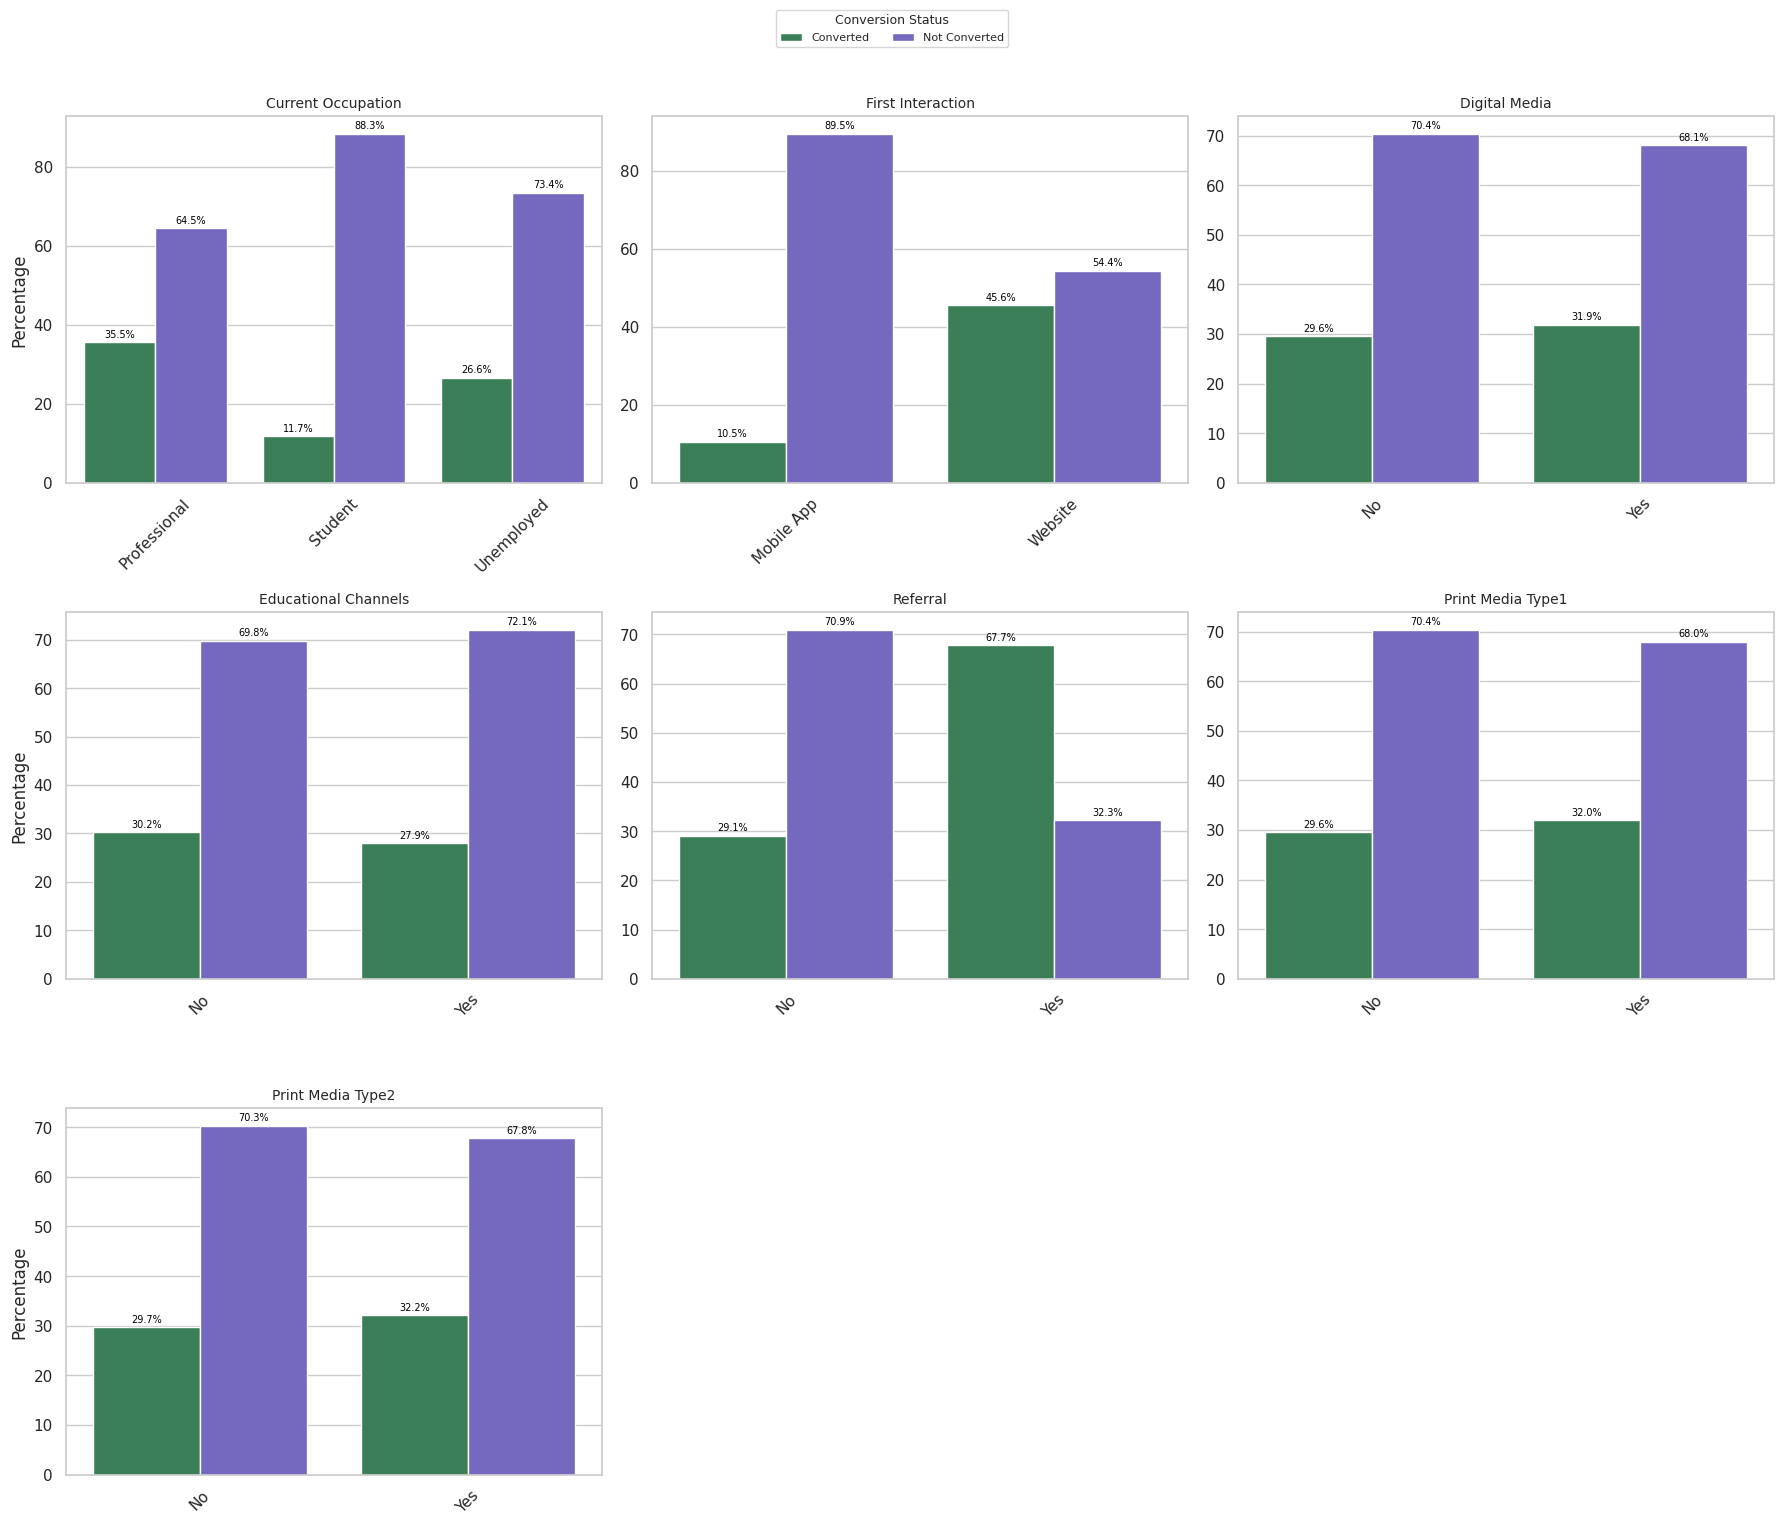

In [ ]:
# Define categorical columns
categorical_cols = [
    'current_occupation', 'first_interaction', 'digital_media',
    'educational_channels', 'referral', 'print_media_type1', 'print_media_type2'
]

# Set style and custom color palette
sns.set(style="whitegrid")
custom_palette = {'Not Converted': '#6A5ACD', 'Converted': '#2E8B57'}  # dark purple & green

# Set up subplots
cols_per_row = 3
num_rows = math.ceil(len(categorical_cols) / cols_per_row)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(6 * cols_per_row, 5 * num_rows), sharey=False)
axes = axes.flatten()

legend_handles_labels = None

# Plotting loop
for i, col in enumerate(categorical_cols):
    counts = data.groupby([col, 'status_labeled']).size().reset_index(name='count')
    total_counts = data.groupby(col).size().reset_index(name='total')
    merged = pd.merge(counts, total_counts, on=col)
    merged['Percentage'] = (merged['count'] / merged['total']) * 100

    ax = axes[i]
    barplot = sns.barplot(
        data=merged,
        x=col,
        y='Percentage',
        hue='status_labeled',
        palette=custom_palette,
        ax=ax
    )

    if legend_handles_labels is None:
        legend_handles_labels = ax.get_legend_handles_labels()

    ax.get_legend().remove()

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=2, fontsize=7, color='black')

    ax.set_title(col.replace('_', ' ').title(), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('' if i % cols_per_row != 0 else 'Percentage')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add universal legend
handles, labels = legend_handles_labels
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    fontsize=8,
    title='Conversion Status',
    title_fontsize=9
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

---
| Variable                   | Key Insight                                                                                                                                                           |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Current Occupation**     | Students had the highest conversion rate, followed by working professionals. This suggests active career or learning phases correlate with higher engagement. |
| **First Interaction**      | Leads who interacted via Website converted at a higher rate than those via Mobile App, indicating web-based engagement may signal stronger intent.            |
| **Digital Media**          | Prospects engaged through digital channels showed moderate conversion, reinforcing the importance of online presence but with room to optimize targeting.     |
| **Educational Channels**   | Leads reached through educational platforms converted more than those who weren't, suggesting pre-informed users may be more inclined to enroll.                  |
| **Referral**               | Referrals had a strong positive impact on conversion, showing that trusted recommendations are highly effective.                                              |
| **Print Media Type 1 & 2** | Print channels showed low conversion, highlighting limited effectiveness compared to digital or direct referrals.                                             |

---


---

We'll conduct a deeper analysis to uncover patterns and develop a comprehensive profile of leads most likely to convert.

---

In [ ]:
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Mean of numerical variables grouped by attrition
data.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


In [ ]:
# Sample group_features and num_cols for demonstration
group_features = [
    'last_activity', 'current_occupation', 'first_interaction',
    'profile_completed', 'print_media_type1', 'print_media_type2',
    'digital_media', 'referral'
]

num_cols = ['age', 'time_spent_on_website', 'website_visits', 'page_views_per_visit']

# Grouped mean calculations
grouped_means = {
    feature: data.groupby([feature, 'status'])[num_cols].mean().round(2)
    for feature in group_features
}

# Display all tables with spacing and bolded titles
from IPython.display import display, Markdown

for feature, df in grouped_means.items():
    display(Markdown(f"**Average Metrics by {feature.replace('_', ' ').title()} and Conversion Status**"))
    display(df)
    display(Markdown("---"))  # Adds spacing between tables


**Average Metrics by Last Activity and Conversion Status**

age  time_spent_on_website  website_visits  \
last_activity    status                                                 
Email Activity   0       45.55                 553.25            3.50   
                 1       48.41                1093.87            3.61   
Phone Activity   0       44.90                 670.77            3.64   
                 1       49.35                 945.43            3.35   
Website Activity 0       44.57                 500.19            3.68   
                 1       48.65                1103.25            3.53   

                         page_views_per_visit  
last_activity    status                        
Email Activity   0                       2.91  
                 1                       3.01  
Phone Activity   0                       3.09  
                 1                       3.08  
Website Activity 0                       3.19  
                 1                       3.03

---

**Average Metrics by Current Occupation and Conversion Status**

age  time_spent_on_website  website_visits  \
current_occupation status                                                 
Professional       0       49.04                 558.72            3.57   
                   1       49.90                1043.27            3.56   
Student            0       21.17                 632.29            3.82   
                   1       20.92                1002.58            3.66   
Unemployed         0       50.05                 581.83            3.48   
                   1       50.38                1140.51            3.45   

                           page_views_per_visit  
current_occupation status                        
Professional       0                       3.00  
                   1                       3.02  
Student            0                       3.27  
                   1                       3.16  
Unemployed         0                       2.95  
                   1                       3.01

---

**Average Metrics by First Interaction and Conversion Status**

age  time_spent_on_website  website_visits  \
first_interaction status                                                 
Mobile App        0       46.11                 649.76            3.71   
                  1       47.13                1317.89            3.82   
Website           0       43.87                 480.55            3.40   
                  1       48.95                1021.47            3.48   

                          page_views_per_visit  
first_interaction status                        
Mobile App        0                       3.04  
                  1                       3.06  
Website           0                       3.00  
                  1                       3.02

---

**Average Metrics by Profile Completed and Conversion Status**

age  time_spent_on_website  website_visits  \
profile_completed status                                                 
High              0       44.67                 618.73            3.63   
                  1       48.54                 944.39            3.39   
Low               0       43.63                 340.93            3.91   
                  1       47.88                 232.25            4.62   
Medium            0       45.59                 560.35            3.53   
                  1       48.95                1361.53            3.85   

                          page_views_per_visit  
profile_completed status                        
High              0                       3.05  
                  1                       2.98  
Low               0                       3.12  
                  1                       3.75  
Medium            0                       3.00  
                  1                       3.12

---

**Average Metrics by Print Media Type1 and Conversion Status**

age  time_spent_on_website  website_visits  \
print_media_type1 status                                                 
No                0       45.14                 578.65            3.60   
                  1       48.61                1083.10            3.50   
Yes               0       45.22                 566.91            3.37   
                  1       49.07                 955.75            3.79   

                          page_views_per_visit  
print_media_type1 status                        
No                0                       3.04  
                  1                       3.05  
Yes               0                       2.94  
                  1                       2.87

---

**Average Metrics by Print Media Type2 and Conversion Status**

age  time_spent_on_website  website_visits  \
print_media_type2 status                                                 
No                0       45.12                 573.25            3.57   
                  1       48.66                1066.91            3.55   
Yes               0       45.77                 658.61            3.75   
                  1       48.73                1094.25            3.28   

                          page_views_per_visit  
print_media_type2 status                        
No                0                       3.02  
                  1                       3.02  
Yes               0                       3.10  
                  1                       3.17

---

**Average Metrics by Digital Media and Conversion Status**

age  time_spent_on_website  website_visits  \
digital_media status                                                 
No            0       45.03                 570.85            3.59   
              1       48.67                1053.35            3.52   
Yes           0       46.14                 630.03            3.52   
              1       48.61                1176.69            3.64   

                      page_views_per_visit  
digital_media status                        
No            0                       3.03  
              1                       3.02  
Yes           0                       3.02  
              1                       3.08

---

**Average Metrics by Referral and Conversion Status**

age  time_spent_on_website  website_visits  \
referral status                                                 
No       0       45.18                 576.42            3.58   
         1       48.70                1062.56            3.53   
Yes      0       42.53                 684.03            3.67   
         1       47.97                1190.06            3.78   

                 page_views_per_visit  
referral status                        
No       0                       3.02  
         1                       3.04  
Yes      0                       3.45  
         1                       2.77

---

---

**Key Conversion Insights**

* **Engagement Depth:** Converted leads spend 2x more time on site than non-converters.
* **Age Matters:** Converters are on average 3.5 years older, signaling stronger intent.
* **Channel Behavior:** Phone converts older leads; website first-touch also trends older than mobile.
* **Student Leads:** Skew 30 years younger and make up a small lead share.
* **Profile Completeness:** Low-profile leads view 25% more pages but spend half the time—indicating content or UX friction.

---


**Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

---



In [ ]:
# Ensure 'status' is integer for calculations
data['status'] = data['status'].astype(int)

# Create labeled version for visualization
data['status_labeled'] = data['status'].map({0: 'Not Converted', 1: 'Converted'})

# Group by occupation and numeric status
occupation_summary = (
    data.groupby(['current_occupation', 'status'])  # status remains integer
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: 'Not Converted (0)', 1: 'Converted (1)'})
)

# Add total leads and conversion rate
occupation_summary['Total Leads'] = occupation_summary.sum(axis=1)
occupation_summary['Conversion Rate (%)'] = (
    occupation_summary['Converted (1)'] / occupation_summary['Total Leads'] * 100
).round(2)

# Sort by conversion rate
occupation_summary = occupation_summary.sort_values(by='Conversion Rate (%)', ascending=False)

# Reset index for clean display
occupation_summary = occupation_summary.reset_index()

# Display summary table
print("Conversion Performance by Occupation:\n")
display(occupation_summary)

Conversion Performance by Occupation:



status,current_occupation,Not Converted (0),Converted (1),Total Leads,Conversion Rate (%)
0,Professional,1687,929,2616,35.51
1,Unemployed,1058,383,1441,26.58
2,Student,490,65,555,11.71


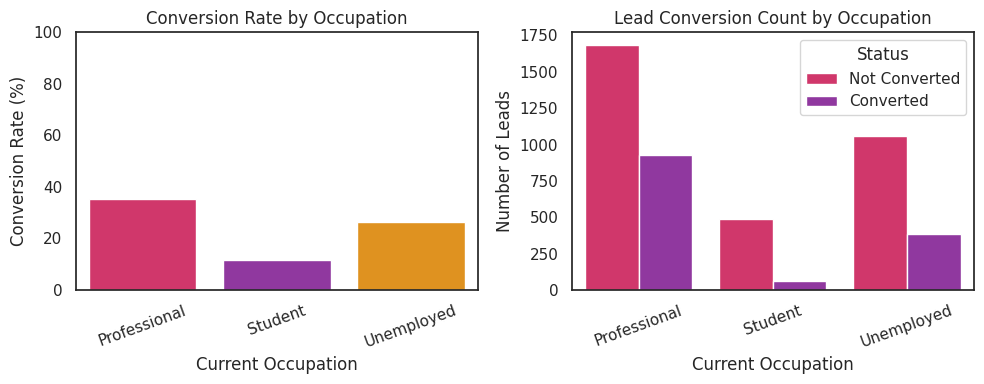

In [ ]:
# Set style and define flat (non-shaded) pink, purple, and orange colors
sns.set(style="white")
custom_palette = [
    '#e91e63',  # pink
    '#9c27b0',  # purple
    '#ff9800',  # orange
    '#f06292',  # light pink
    '#ab47bc',  # medium purple
    '#fb8c00'   # deep orange
]
# Group the data by current_occupation and status
occupation_melted = data.groupby(['current_occupation', 'status']).size().reset_index(name='count')
occupation_melted['status'] = occupation_melted['status'].map({0: 'Not Converted', 1: 'Converted'})

# Prepare summary for conversion rate
occupation_status = (
    data.groupby('current_occupation')['status']
    .agg(['count', 'mean'])
    .rename(columns={'count': 'Lead Count', 'mean': 'Conversion Rate'})
)
occupation_status['Conversion Rate (%)'] = (occupation_status['Conversion Rate'] * 100).round(2)

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Conversion rate by occupation
sns.barplot(
    x=occupation_status.index,
    y=occupation_status['Conversion Rate (%)'],
    palette=custom_palette,
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Occupation')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_xlabel('Current Occupation')
axes[0].set_ylim(0, 100)
axes[0].tick_params(axis='x', rotation=20)

# Plot 2: Count of converted vs not converted by occupation
sns.barplot(
    x='current_occupation',
    y='count',
    hue='status',
    data=occupation_melted,
    palette=custom_palette[:2],  # Use first two shades for status
    ax=axes[1]
)
axes[1].set_title('Lead Conversion Count by Occupation')
axes[1].set_ylabel('Number of Leads')
axes[1].set_xlabel('Current Occupation')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

**Impact of Current Occupation on Lead Conversion**

* Professionals convert at the highest rate (~36%), suggesting strong alignment between the course offering and their career goals or upskilling needs.

* Unemployed leads show a moderate conversion rate (~28%), indicating potential interest driven by reskilling or career transition goals.

* Students have the lowest conversion rate (~12%), despite moderate engagement, suggesting the course may not align well with their immediate priorities or expectations.

* In terms of volume, professionals represent the largest lead segment and contribute the most to total conversions.

* The student and unemployed segments, while smaller in size, may benefit from tailored messaging or program positioning to better address their motivations.

---

**The company's first impression on the customer must have an impact. Do the  first channels of interaction have an impact on the lead status?**

---




In [ ]:
# Group by first_interaction and calculate count & conversion rate
channel_summary = (
    data.groupby('first_interaction')['status']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={
        'first_interaction': 'Channel',
        'count': 'Lead Count',
        'mean': 'Conversion Rate'
    })
)
channel_summary['Conversion Rate (%)'] = (channel_summary['Conversion Rate'] * 100).round(2)

# Display tabular summary
print("Impact of First Interaction Channel on Lead Status:\n")
from IPython.display import display
display(channel_summary)

Impact of First Interaction Channel on Lead Status:



,Channel,Lead Count,Conversion Rate,Conversion Rate (%)
0,Mobile App,2070,0.105314,10.53
1,Website,2542,0.455940,45.59


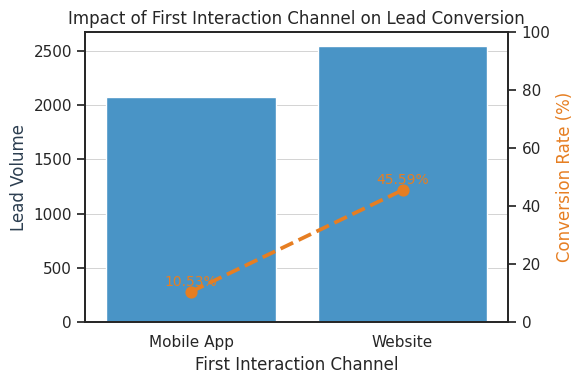

In [ ]:
# Prepare summary
summary = (
    data.groupby('first_interaction')['status']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={
        'first_interaction': 'Channel',
        'count': 'Lead Volume',
        'mean': 'Conversion Rate'
    })
)
summary['Conversion Rate (%)'] = (summary['Conversion Rate'] * 100).round(2)

# Set style
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(6, 4))  # Smaller figure size

# Bar plot (Lead Volume) in blue
sns.barplot(data=summary, x='Channel', y='Lead Volume', ax=ax1, color='#3498db')
ax1.set_ylabel('Lead Volume', color='#2c3e50')
ax1.set_xlabel('First Interaction Channel')
ax1.set_title('Impact of First Interaction Channel on Lead Conversion', fontsize=12)

# Clean up x-axis grid (remove overlapping lines)
ax1.grid(visible=True, which='major', axis='y', linestyle='-', linewidth=0.6)
ax1.grid(visible=False, which='minor')  # Hide minor grids

# Line plot (Conversion Rate) in orange
ax2 = ax1.twinx()
sns.pointplot(data=summary, x='Channel', y='Conversion Rate (%)', ax=ax2,
              color='#e67e22', markers='o', linestyles='--')
ax2.set_ylabel('Conversion Rate (%)', color='#e67e22')
ax2.set_ylim(0, 100)

# Annotate conversion rates
for i, row in summary.iterrows():
    ax2.text(i, row['Conversion Rate (%)'] + 2, f"{row['Conversion Rate (%)']}%",
             color='#e67e22', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

---
**Impact of First Interaction Channels on Lead Conversion**

* Conversion rates vary significantly by entry channel, confirming that the company's first impression influences lead outcomes.

* The Website channel demonstrated a conversion rate of ~45.6%, far outperforming the Mobile App, which converted only ~10.5% of leads. This suggests that website visitors are more qualified or experience a better onboarding journey.

* Despite similar lead volumes, the Website channel contributes disproportionately to total conversions, making it the most impactful first touchpoint.

* The Mobile App, while a strong source of traffic, underperforms in converting leads—indicating a need to re-evaluate UX, messaging, or audience targeting on that platform.
---

---

**The company uses multiple modes to interact with prospects. Which way of interaction works best?**

---

In [ ]:
# Ensure 'status' is integer for calculations
data['status'] = data['status'].astype(int)

# Create labeled version for visualization
data['status_labeled'] = data['status'].map({0: 'Not Converted', 1: 'Converted'})

# Define interaction channels
interaction_cols = [
    'first_interaction',
    'print_media_type1',
    'print_media_type2',
    'digital_media',
    'educational_channels',
    'referral'
]

# Build summary table across interaction channels
summary_df = pd.concat([
    data.groupby(col)['status'].agg(['count', 'mean'])
        .reset_index()
        .rename(columns={col: 'Response', 'count': 'Lead Count', 'mean': 'Conversion Rate'})
        .assign(
            Interaction_Mode=col.replace('_', ' ').title(),
            Conversion_Rate_Percent=lambda x: (x['Conversion Rate'] * 100).round(2)
        )
    for col in interaction_cols
], ignore_index=True)

# Reorder columns
summary_df = summary_df[['Interaction_Mode', 'Response', 'Lead Count', 'Conversion_Rate_Percent']]

# Display summary
print("Conversion Performance by Interaction Channel:\n")
display(summary_df.sort_values(by='Conversion_Rate_Percent', ascending=False))

Conversion Performance by Interaction Channel:



,Interaction_Mode,Response,Lead Count,Conversion_Rate_Percent
11,Referral,Yes,93,67.74
1,First Interaction,Website,2542,45.59
5,Print Media Type2,Yes,233,32.19
3,Print Media Type1,Yes,497,31.99
7,Digital Media,Yes,527,31.88
8,Educational Channels,No,3907,30.20
4,Print Media Type2,No,4379,29.73
2,Print Media Type1,No,4115,29.60
6,Digital Media,No,4085,29.60
10,Referral,No,4519,29.08


---
| Interaction Mode         | Top Performing Response | Conversion Rate (%) | Notes                                                                           |
| ------------------------ | ----------------------- | ------------------- | ------------------------------------------------------------------------------- |
| **Referral**             | Yes                     | **67.74%**          | Highest conversion, but low volume (93 leads). Highly effective, underutilized. |
| **First Interaction**    | Website                 | **45.59%**          | Strong performance with **high volume** (2,542 leads). Key conversion driver.   |
| **Print Media Type 1**   | Yes                     | 31.99%              | Moderate effectiveness when leads respond positively.                           |
| **Print Media Type 2**   | Yes                     | 32.19%              | Similar to Media Type 1. Moderate conversion.                                   |
| **Digital Media**        | Yes                     | 31.88%              | Performs similarly to print when interacted with.                               |
| **Educational Channels** | No                      | 30.20%              | Converts better among those not engaged—may indicate messaging issues.          |
| **Mobile App**           | —                       | **10.53%**          | Lowest conversion. Likely needs redesign or re-engagement strategies.           |


---
Referral is the most effective interaction mode with a conversion rate of 67.7%, though it reaches a smaller audience. For scale, the Website as the first point of contact performs best among high-volume channels, converting at 45.6%. In contrast, the Mobile App shows the weakest performance at 10.5%, indicating a need for improvement. Focusing on expanding referral programs and optimizing website engagement can significantly boost lead conversions.

---


**The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

---


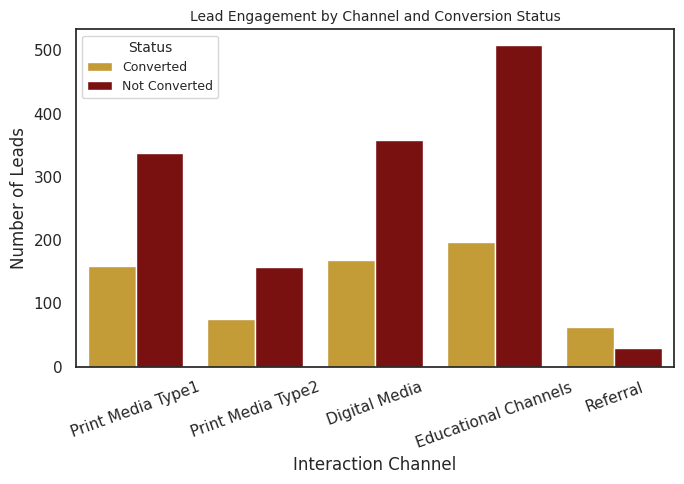

In [ ]:
# Ensure 'status' is numeric and labeled
data['status'] = data['status'].astype(int)
data['status_labeled'] = data['status'].map({0: 'Not Converted', 1: 'Converted'})

# List of lead interaction channels
lead_channels = [
    'print_media_type1', 'print_media_type2',
    'digital_media', 'educational_channels', 'referral'
]

# Create summary DataFrame
engagement_summary = pd.DataFrame()

for col in lead_channels:
    temp = (
        data.groupby([col, 'status_labeled']).size()
        .reset_index(name='Lead Count')
        .rename(columns={col: 'Response'})
    )
    temp['Interaction Channel'] = col.replace('_', ' ').title()
    engagement_summary = pd.concat([engagement_summary, temp], ignore_index=True)

# Filter for engaged leads (Response == 'Yes')
engaged_summary = engagement_summary[engagement_summary['Response'] == 'Yes']

# Define a darker palette
dark_palette = {
    'Not Converted': '#8B0000',  # Dark Red
    'Converted': '#DAA520'       # Goldenrod (dark gold)
}

# Plot grouped bar chart
plt.figure(figsize=(7, 5))
sns.barplot(
    data=engaged_summary,
    x='Interaction Channel',
    y='Lead Count',
    hue='status_labeled',
    palette=dark_palette
)

plt.title('Lead Engagement by Channel and Conversion Status', fontsize=10)
plt.ylabel('Number of Leads')
plt.xlabel('Interaction Channel')
plt.xticks(rotation=20)
plt.legend(title='Status')

# Reduced legend size
plt.legend(title='Status', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()

---

**People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

---



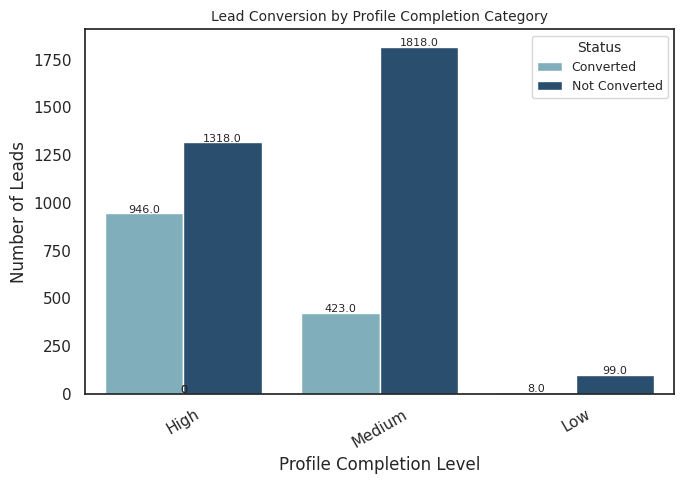

In [ ]:
# Ensure 'status' is numeric and labeled
data['status'] = data['status'].astype(int)
data['status_labeled'] = data['status'].map({0: 'Not Converted', 1: 'Converted'})

# Set style and darker palette
sns.set(style='white')
palette = {'Not Converted': '#1f4e79', 'Converted': '#76b5c5'}

# Plot
plt.figure(figsize=(7, 5))
ax = sns.countplot(
    x='profile_completed',
    hue='status_labeled',
    data=data,
    palette=palette
)

# Label counts on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 3), ha='center', fontsize=8)

# Formatting
ax.set_title('Lead Conversion by Profile Completion Category', fontsize=10)
ax.set_xlabel('Profile Completion Level')
ax.set_ylabel('Number of Leads')
plt.xticks(rotation=30)
ax.legend(title='Lead Status', loc='upper right')
# Reduced legend size
plt.legend(title='Status', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()

---

Having more details about a prospect does increase the chances of conversion. The data shows a clear upward trend in conversion rates as profile completeness increases:

* Leads with high profile completion had the highest conversion count, indicating stronger intent or engagement.

* Leads with low profile completion almost never converted, suggesting lower interest or qualification.

This implies that profile completeness is a strong indicator of conversion likelihood, and encouraging users to provide more personal information early on could meaningfully improve conversion performance.

---


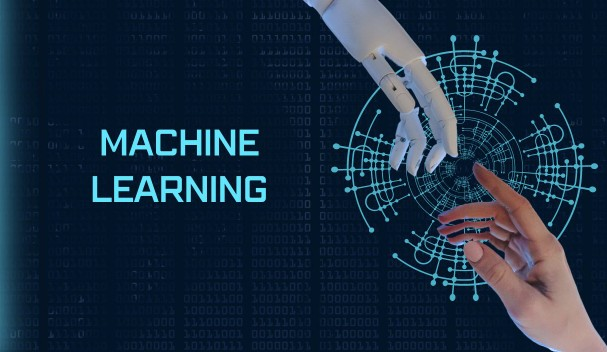

---

**Data Preparation for Predictive Modeling**

To forecast lead conversion likelihood, we begin by transforming categorical features through encoding, enabling seamless integration into machine learning algorithms. Following this, the dataset will be partitioned into training and testing subsets to facilitate robust model evaluation and ensure generalizability to unseen data.

---

In [ ]:
# Loading the dataset
data=pd.read_excel("/content/drive/MyDrive/Elective_PDS/ExtraaLearn.xlsx")

# drop the ID column
data = data.drop(['ID'], axis = 1)

# Removing outliers
data = data[data['website_visits'] < q1]
data = data[data['page_views_per_visit'] < q2]

# Check the size of the feature engineered data.
print(data.shape)

(3596, 14)


In [ ]:
# Separating the target variable and other variables
X = data.drop(columns = 'status') #make a copy called X which is a dataframe with "booking_status" removed
Y = data['status'] #Y is a series (column) containing the "booking_status"

# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [ ]:
# Shape of training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}\n")

# Class distribution in training set
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True).map("{:.2%}".format), "\n")

# Class distribution in test set
print("Class distribution in test set:")
print(y_test.value_counts(normalize=True).map("{:.2%}".format))

Training set shape: (2517, 16)
Test set shape: (1079, 16)

Class distribution in training set:
status
0    70.48%
1    29.52%
Name: proportion, dtype: object 

Class distribution in test set:
status
0    67.38%
1    32.62%
Name: proportion, dtype: object


In [ ]:
#converting data types of integer columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

---

We split the dataset into training and test sets using a 70/30 ratio to build and evaluate our predictive model. The training set (70%) is used to train the model, while the test set (30%) allows us to assess how well the model generalizes to new, unseen data. We also ensured class balance visibility by checking the proportion of converted vs. not converted leads in each set.

---

## Model Performance evaluation and improvement

**Building Classification Models**

Before training the model, we must select an appropriate evaluation metric aligned with our objective, accurately identifying leads likely to convert.

**Model Evaluation Considerations**

1) A predictive model can make two types of errors:

 * False Negative (FN): Predicting a lead will not convert, but it actually does.

* False Positive (FP): Predicting a lead will convert, but it actually doesn't.

2) Business Impact:

* False Negatives result in lost revenue opportunities (high cost).

* False Positives result in wasted sales and marketing resources.

3) Priority: Minimizing False Negatives is critical, losing a potential customer is more costly than nurturing an unqualified one.

4) Key Metric:

* Maximize Recall — improves the model’s ability to capture true conversions (minimizes false negatives).

* In our context, Recall measures how well we identify converting leads.
---




In [ ]:
# Display classification metrics and formatted confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, target_names=['Not Converted', 'Converted']))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

**Decision Tree - Base Model**

In [ ]:
# Building and fitting decision tree model
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

               precision    recall  f1-score   support

Not Converted       1.00      1.00      1.00      1774
    Converted       1.00      1.00      1.00       743

     accuracy                           1.00      2517
    macro avg       1.00      1.00      1.00      2517
 weighted avg       1.00      1.00      1.00      2517



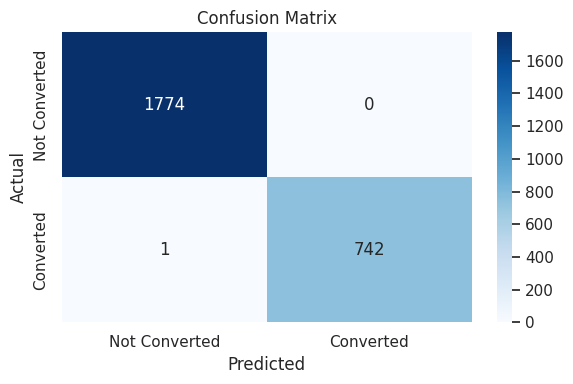

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Converted       0.86      0.86      0.86       727
    Converted       0.70      0.70      0.70       352

     accuracy                           0.81      1079
    macro avg       0.78      0.78      0.78      1079
 weighted avg       0.81      0.81      0.81      1079



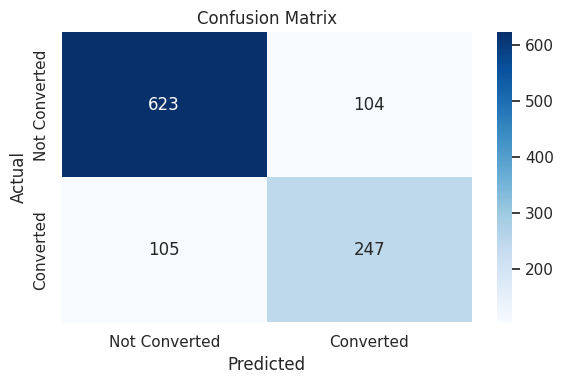

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

---

**Training Set:** Achieved perfect accuracy (100%), indicating the model learned the training data completely.
 High recall and precision suggest the model fits well—but this is a red flag for overfitting.

**Test Set:** Significantly lower accuracy compared to training performance.
 Drop in recall and precision confirms poor generalization to unseen data. Model likely memorized patterns instead of learning meaningful general rules.

**Conclusion:**
The Decision Tree is overfitting, capturing noise instead of signal. Regularization (like pruning) or switching to more robust models (e.g., Random Forest) is recommended.

----


In [ ]:
# Displaying feature importance from the decision tree model
feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': dt.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)
)

print("Feature Importance Ranking:\n")
print(feature_importance)

Feature Importance Ranking:

                           Feature  Importance
0            time_spent_on_website    0.265220
1        first_interaction_Website    0.149246
2         profile_completed_Medium    0.132275
3             page_views_per_visit    0.124649
4                              age    0.098233
5     last_activity_Phone Activity    0.051473
6                   website_visits    0.050621
7    current_occupation_Unemployed    0.038918
8            profile_completed_Low    0.022233
9   last_activity_Website Activity    0.016927
10           print_media_type1_Yes    0.012366
11               digital_media_Yes    0.010258
12           print_media_type2_Yes    0.009870
13        educational_channels_Yes    0.007626
14                    referral_Yes    0.007365
15      current_occupation_Student    0.002722


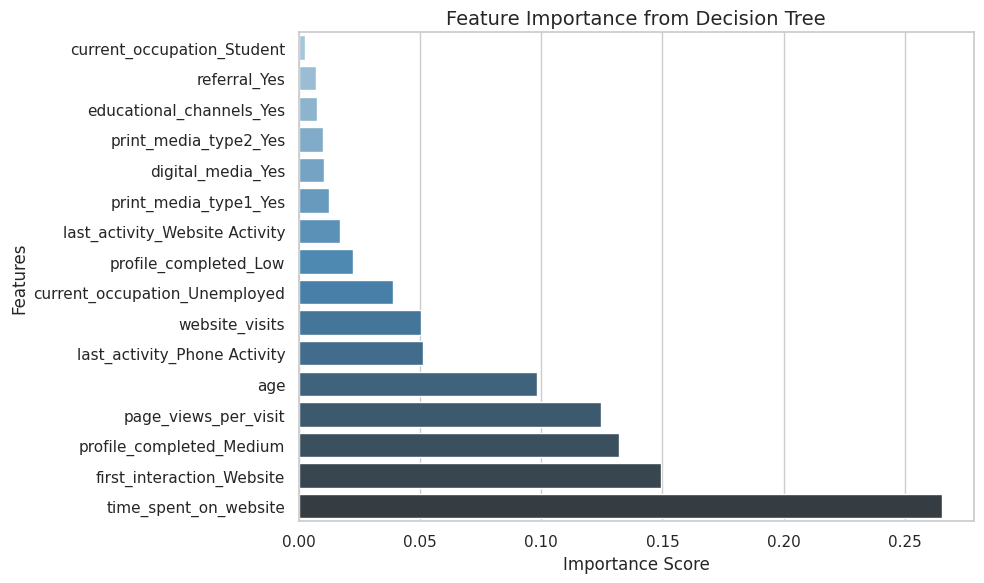

In [ ]:
# Create a DataFrame of feature importances
feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': dt.feature_importances_
    })
    .sort_values(by='Importance', ascending=True)  # Ascending for horizontal bar chart
)

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Feature',
    palette='Blues_d'
)

# Add title and labels
plt.title('Feature Importance from Decision Tree', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Display the plot
plt.tight_layout()
plt.show()

**Decision Tree - Hyperparameter Tuning**

In [ ]:
# Set hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# GridSearchCV with recall focus
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Predict on both training and test sets
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)


Training Set Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1774
           1       0.59      0.91      0.72       743

    accuracy                           0.79      2517
   macro avg       0.77      0.82      0.77      2517
weighted avg       0.84      0.79      0.80      2517

Confusion Matrix:



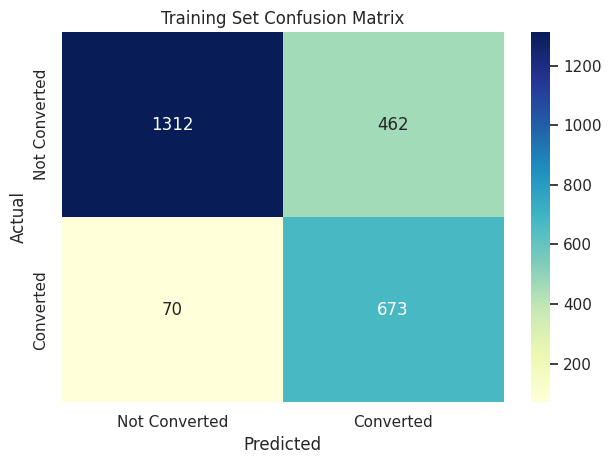


Test Set Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       727
           1       0.65      0.91      0.76       352

    accuracy                           0.81      1079
   macro avg       0.80      0.84      0.80      1079
weighted avg       0.85      0.81      0.81      1079

Confusion Matrix:



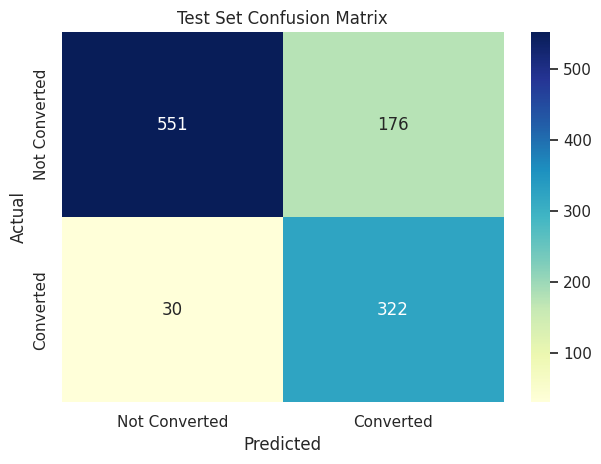

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8091


In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, title):
    print(f"\n{title} Classification Report:\n")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{title} Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Evaluate on training and test data
evaluate_model(y_train, train_preds, "Training Set")
evaluate_model(y_test, test_preds, "Test Set")

# Print best hyperparameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", round(accuracy_score(y_test, test_preds), 4))

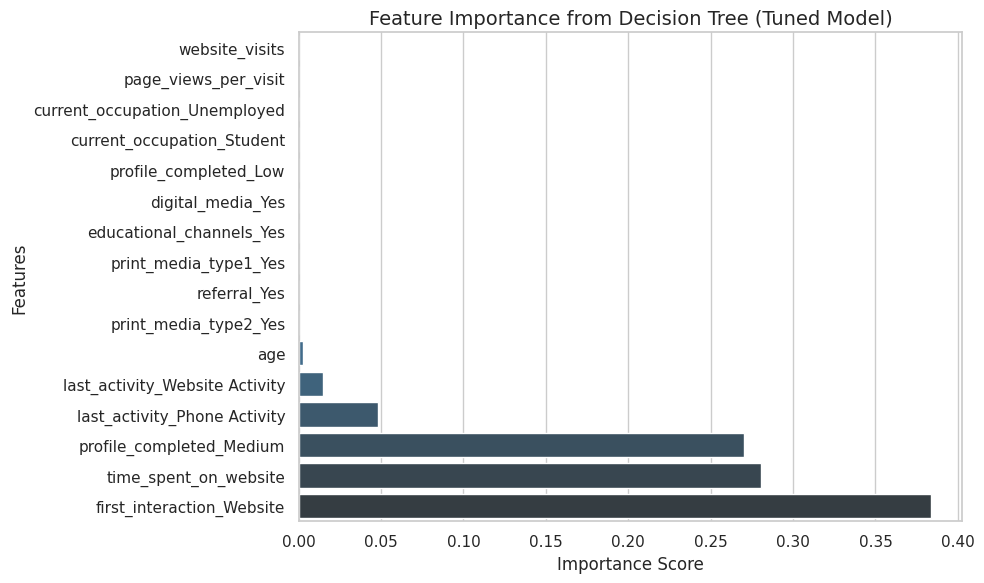

In [ ]:
# Create a DataFrame for feature importances
importances = (
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
    .sort_values(by='Importance', ascending=True)  # Ascending for horizontal bars
)

# Set plot style
sns.set(style="whitegrid")

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances,
    x='Importance',
    y='Feature',
    palette='Blues_d'
)

# Add labels and title
plt.title('Feature Importance from Decision Tree (Tuned Model)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

---

**Model Improvement Summary**

* Addressed Overfitting
→ The initial model showed perfect accuracy on training data but lower performance on test data, a classic sign of overfitting.

* Applied Hyperparameter Tuning
→ Used GridSearchCV with 5-fold cross-validation to find the optimal combination of:

 * max_depth: Limits tree depth to prevent over-complexity.

 * min_samples_leaf: Ensures each leaf has enough observations.

 * criterion: Compared Gini and Entropy for best split quality.

* Handled Class Imbalance:
  Adjusted class_weight to penalize misclassifying the minority class (Converted leads) more heavily — improving recall where it matters.

* Focused on Business-Critical Metric
→ Optimized for Recall of Converted leads (class 1) to reduce missed conversion opportunities, which is more costly to the business than false positives.

* Validated Results on Train and Test Sets
→ Evaluated both training and testing performance to ensure better generalization — not just memorization.

---


**Tuned Decision Tree Model Effectively Captures Convertible Leads**

| Metric                 | Training Set | Test Set |
| ---------------------- | ------------ | -------- |
| **Accuracy**           | 79%          | **81%**  |
| **Converted Recall**     | **91%**      | **91%**  |
| **Converted Precision**  | 59%          | 65%      |
| **Not Converted Recall**     | 74%          | 76%      |
| **F1 Score (Class 1)** | 72%          | 76%      |

The tuned Decision Tree model demonstrates strong generalization, with comparable accuracy on the training (79%) and test (81%) datasets, indicating it is not overfitting. Most notably, the model achieves a high recall of 91% for converted leads (class 1) on both sets, which is critical for minimizing false negatives and ensuring potential conversions are not overlooked. While precision for class 1 is moderately lower (59% train, 65% test), this trade-off is acceptable given the business priority of capturing as many convertible leads as possible. Overall, the model effectively balances performance, aligning well with the strategic goal of maximizing lead conversion.

---


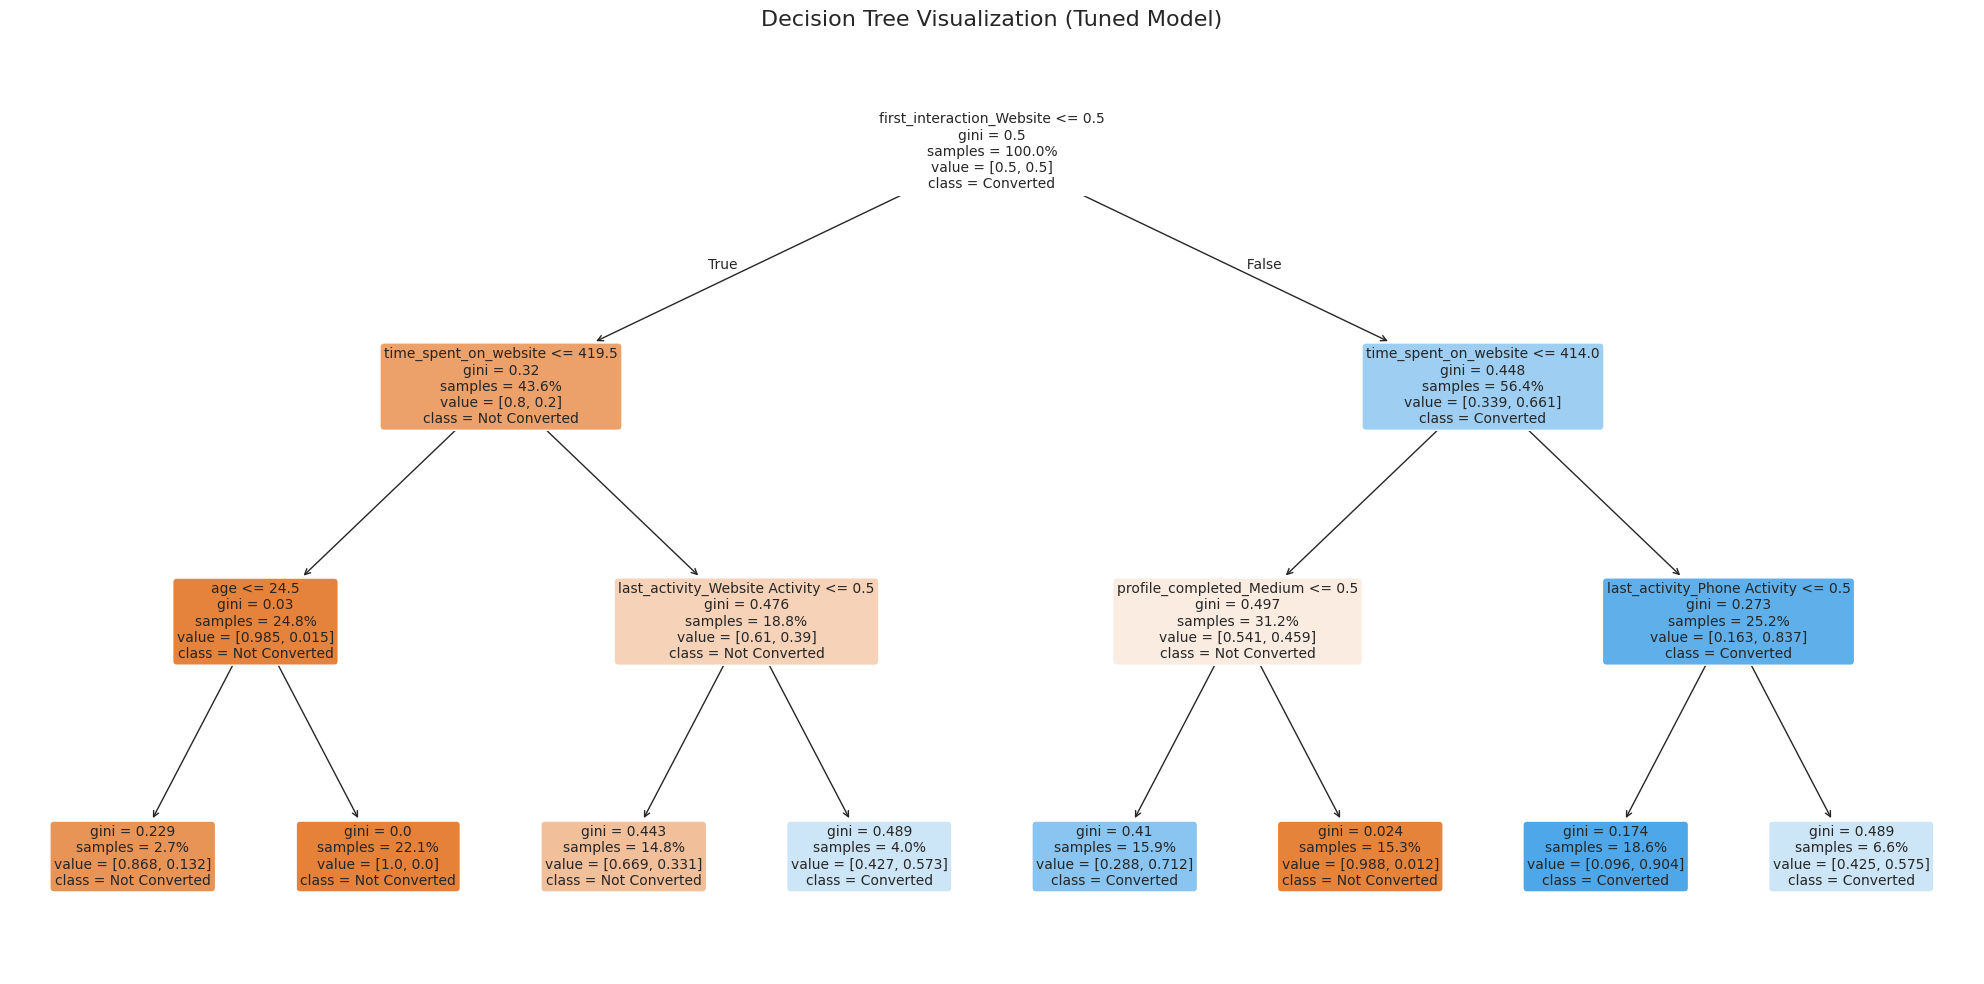

In [ ]:
# Visualize the tuned Decision Tree model
plt.figure(figsize=(20, 10))  # Wider canvas for clearer text
plot_tree(
    best_model,
    feature_names=X_train.columns,          # or use full list of features if renamed
    class_names=['Not Converted', 'Converted'],
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=True,                          # Show Gini/Entropy
    proportion=True                         # Show class proportions in leaves
)

plt.title("Decision Tree Visualization (Tuned Model)", fontsize=16)
plt.tight_layout()
plt.show()

## Building a Random Forest model

**Random Forest - Basic Model**


 Classification Report: Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00       743

    accuracy                           1.00      2517
   macro avg       1.00      1.00      1.00      2517
weighted avg       1.00      1.00      1.00      2517



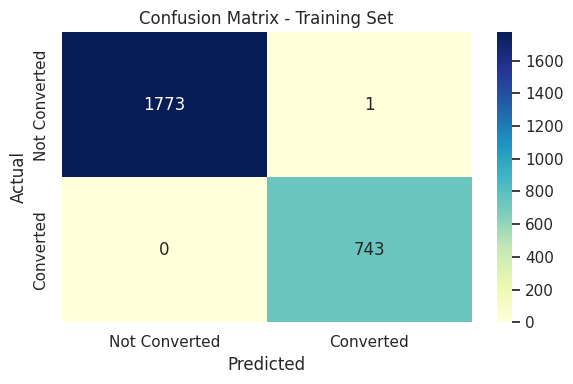


 Classification Report: Test Set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       727
           1       0.83      0.70      0.76       352

    accuracy                           0.85      1079
   macro avg       0.85      0.82      0.83      1079
weighted avg       0.85      0.85      0.85      1079



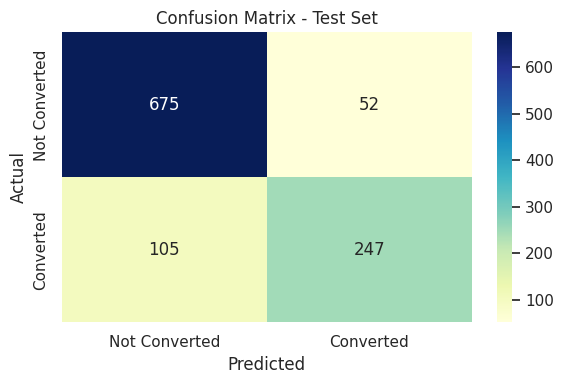

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

# Predictions on both training and test sets
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_label):
    print(f"\n Classification Report: {dataset_label}")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title(f'Confusion Matrix - {dataset_label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate on both sets
evaluate_model(y_train, train_pred, "Training Set")
evaluate_model(y_test, test_pred, "Test Set")

---

The Random Forest model shows clear signs of overfitting, as evidenced by perfect scores (100% precision, recall, and F1-score) on the training set—indicating it has memorized the data rather than learned generalizable patterns. On the test set, recall for converted leads (Class 1) drops sharply from 100% to 70%, and the F1-score falls from 1.00 to 0.76, revealing the model’s inability to perform reliably on unseen data. While overall test accuracy remains high at 85%, the substantial decline in recall for converted leads—our business-critical segment—suggests poor generalization. Although precision remains relatively stable, the model is still missing a significant number of actual converters. As a next step, we will apply a hyperparameter-tuned Random Forest to reduce overfitting and improve the model's real-world performance.

---



**Random Forest - Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [ ]:
# Best model and predictions
best_rf_model = grid_search_rf.best_estimator_
train_preds_rf = best_rf_model.predict(X_train)
test_preds_rf = best_rf_model.predict(X_test)

In [ ]:
# Best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)


 Classification Report: Training Set (Tuned RF)
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1774
           1       0.73      0.86      0.79       743

    accuracy                           0.86      2517
   macro avg       0.83      0.86      0.84      2517
weighted avg       0.87      0.86      0.86      2517



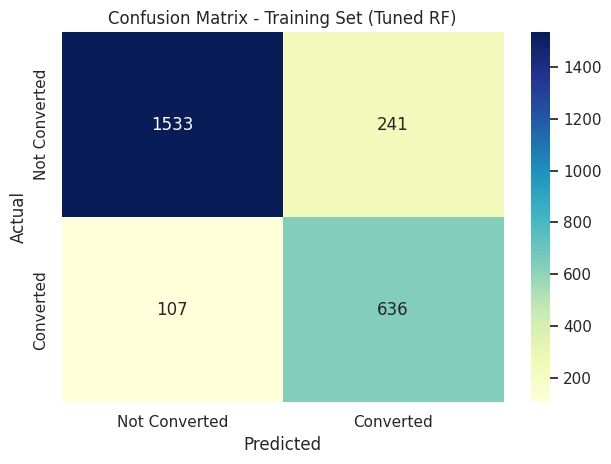


 Classification Report: Test Set (Tuned RF)
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       727
           1       0.74      0.81      0.78       352

    accuracy                           0.85      1079
   macro avg       0.82      0.84      0.83      1079
weighted avg       0.85      0.85      0.85      1079



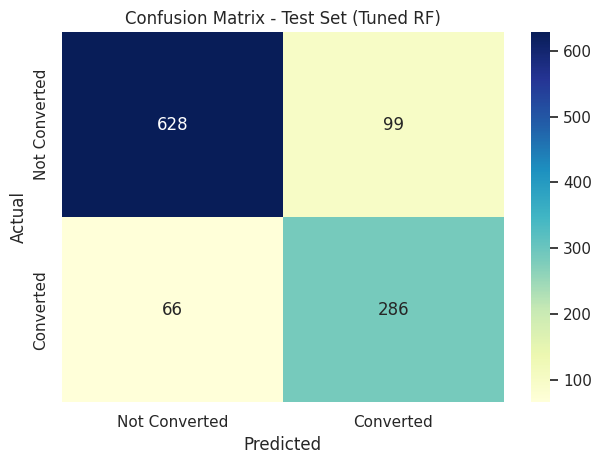

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, dataset_label):
    print(f"\n Classification Report: {dataset_label}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title(f'Confusion Matrix - {dataset_label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate both sets
evaluate_model(y_train, train_preds_rf, "Training Set (Tuned RF)")
evaluate_model(y_test, test_preds_rf, "Test Set (Tuned RF)")

In [ ]:
# Prepare feature importance DataFrame
importances_rf = (
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_rf_model.feature_importances_
    })
    .sort_values(by='Importance', ascending=True)
)

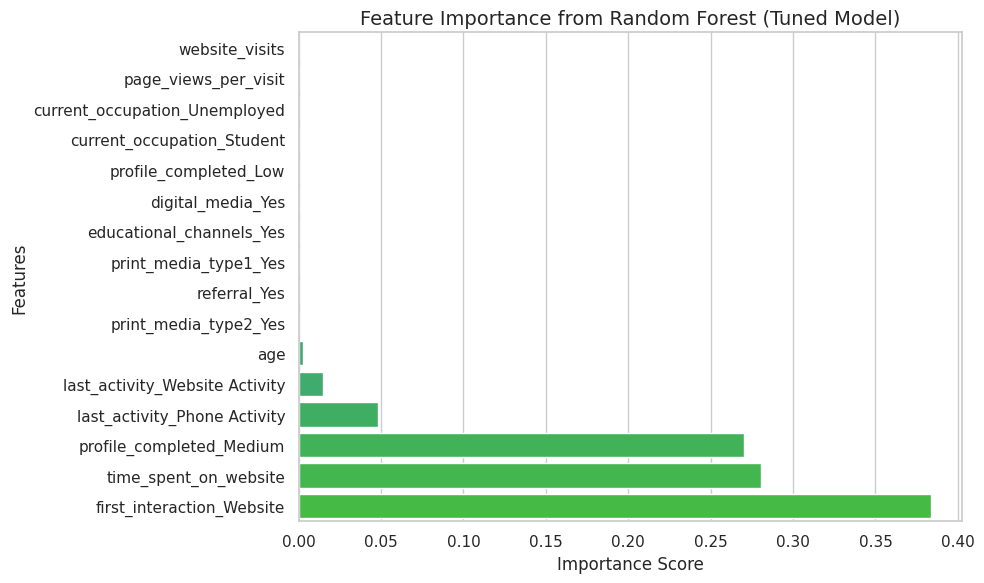

In [ ]:
# Plot with seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a blue to green gradient palette
blue_green_palette = sns.color_palette("blend:#1E90FF,#32CD32", n_colors=len(importances_rf))

sns.barplot(
    data=importances_rf,
    x='Importance',
    y='Feature',
    palette=blue_green_palette
)

plt.title('Feature Importance from Random Forest (Tuned Model)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

---

The hyperparameter-tuned Random Forest model delivers strong and balanced predictive performance, achieving 85% accuracy on the test set with minimal overfitting (86% training accuracy). It maintains a high recall of 81% for converted leads—capturing most conversion opportunities—while improving precision to 74%, thereby reducing false positives and follow-up inefficiencies. For non-converters, the model effectively filters low-quality leads with 90% precision and 86% recall. Compared to the baseline Decision Tree, it offers a significantly better precision-recall tradeoff, making it more actionable for business decisions. Feature importance analysis highlights clear conversion drivers, such as first interaction channel and time-on-site, providing targeted insights for marketing and sales optimization. Overall, the model supports smarter lead prioritization and improved ROI through better resource allocation toward high-conversion prospects.

---


## Actionable Insights and Recommendations



**Key Insights**

---



* **First Interaction Channel Matters:** Prospects whose first interaction was via the website have the strongest predictive power for conversion, as shown by both models' feature importance.

* **Time Spent on Website Drives Conversion:**
Users who spent more time on the site are significantly more likely to convert—suggesting engagement quality is more important than sheer traffic volume.

* **Profile Completion Signals Serious Intent:**
Leads with Medium or High profile completion levels are highly correlated with conversion. This variable was among the top 3 predictors in both models.

* **Phone Activity Beats Website Activity:**
Leads showing last activity via phone are more likely to convert than those interacting only through the website—highlighting the effectiveness of direct communication.

* **Random Forest Outperforms Decision Tree:**
The tuned Random Forest achieved higher precision (0.74) and better generalization than the Decision Tree, especially in reducing false positives for the 'Converted' class.

---



**Strategic Recommendations**

---



| **Area**                      | **Recommendation**                                                                        | **Rationale**                                                                                |
| ----------------------------- | ----------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Lead Follow-Up Strategy**   | Prioritize leads with **recent phone activity**                                           | Phone engagement is a strong signal of conversion likelihood (high feature importance)       |
| **Website Optimization**      | Enhance **time-on-site** through engaging content (e.g., videos, chatbots, product tours) | More time spent correlates with higher conversion probability                                |
| **Profile Completion**        | Encourage users to **complete profiles** via nudges, gamification, or incentives          | Profile completion level is a top predictive factor for conversion                           |
| **Lead Scoring Enhancements** | Integrate **first interaction type** and **engagement metrics** into lead scoring models  | Website-first interaction is the most impactful feature in predicting conversion             |
| **Model Deployment**          | Deploy the **tuned Random Forest model** in CRM or marketing systems                      | Higher generalization, better precision-recall tradeoff for identifying high-potential leads |
| **Model Maintenance**         | Implement **monthly model performance checks** and retrain quarterly                      | Prevents degradation due to data drift and evolving lead behavior                            |


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Potential Customers Prediction_MIT ADS Program_Sona Shakoory_Final"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Potential Customers Prediction_MIT ADS Program_Sona Shakoory_Final to html
[NbConvertApp] WARNING | Alternative text is missing on 33 image(s).
[NbConvertApp] Writing 3578810 bytes to /content/drive/MyDrive/Colab Notebooks/Potential Customers Prediction_MIT ADS Program_Sona Shakoory_Fina.html


In [ ]:
from google.colab import files

# Provide the full path to the file
files.download('/content/drive/MyDrive/Colab Notebooks/Potential Customers Prediction_MIT ADS Program_Sona Shakoory_Final.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>